In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import fnmatch
import shutil
from PIL import Image
from PyPDF2 import PdfFileMerger, PdfFileReader

%config InlineBackend.figure_format = 'svg'

ImportError: No module named PyPDF2

# ReefCore library

**ReefCore**  is a 1D model which simulates evolution of mixed carbonate-siliciclastic system under environmental forcing conditions (e.g. sea-level, water flow, siliciclastic input).

The carbonate production model simulates the logistic growth and interaction among species based on **Generalized Lotka-Volterra** equations. This equation is mainly formed by two parts, the logistic growth/decay of a species and its interaction with the other species,

$$\frac{dx_i}{dt} = \epsilon_i x_i + \sum_{j=1}^{N_s} \alpha_{ij}x_ix_j$$

where $x_i$ is the population density of species _i_; $\epsilon_i$ is the intrinsic rate of increase/decrease of a population of species _i_ (also called **Malthusian** parameter); $\alpha_{ij}$ is the interaction coefficient among the species association _i_ and _j_, (a particular case is $\alpha_{ii}$, the interaction of one species association with itself); and _t_ is time. 

In **ReefCore** the equation is solved using **Runge-Kutta-Fehlberg** method (_RKF45_ or _Fehlberg_ as defined in the odespy library).

In [15]:
from pyReefCore.model import Model

On the library has been loaded, the model initialisation is done using the following command:

In [16]:
# Initialise model
reef = Model()

# Build environmental forcing curves



In [17]:
# reef.enviforcing.buildCurve(timeExt=[0,500],timeStep=10,
#                             funcExt=[0,20],ampExt=[2,5],
#                             periodExt=[100,150])

In [18]:
#reef.enviforcing.plotCurves(size=(3,6), lwidth = 3, title='Sea-level curve [m]', 
#                            color='slateblue', font=8, dpi=80, figName = None)

In [19]:
# reef.enviforcing.exportCurve(nameCSV='data/sealevel.csv')

# XmL input file

The next step consists in defining the initial conditions for our simulation. This is done by using an **XmL** input file which set the parameters to be used, such as:

- the initial species population number $X0$
- the intrinsic rate of a population species $\epsilon$
- the interaction coefficients among the species association $\alpha$

In [20]:
# Define the XmL input file
reef.load_xml('input_v3.xml')

run_nb =0
while os.path.exists('run-%s' % (run_nb)):
      run_nb+=1

if not os.path.exists('run-%s' % (run_nb)):
    os.makedirs('run-%s' % (run_nb))

Visualise the initial conditions of your model run can be done using the following command:

Community matrix aij representing the interactions between species:

               a0            a1            a2            a3            a4  \
a0j -9.000000e-04 -3.000000e-04 -1.000000e-15 -1.000000e-15 -1.000000e-15   
a1j -3.000000e-04 -9.000000e-04 -3.000000e-04 -1.000000e-15 -1.000000e-15   
a2j -1.000000e-15 -3.000000e-04 -9.000000e-04 -3.000000e-04 -1.000000e-15   
a3j -1.000000e-15 -1.000000e-15 -3.000000e-04 -9.000000e-04 -3.000000e-04   
a4j -1.000000e-15 -1.000000e-15 -1.000000e-15 -3.000000e-04 -9.000000e-04   
a5j -1.000000e-15 -1.000000e-15 -1.000000e-15 -1.000000e-15 -3.000000e-04   

               a5  
a0j -1.000000e-15  
a1j -1.000000e-15  
a2j -1.000000e-15  
a3j -1.000000e-15  
a4j -3.000000e-04  
a5j -9.000000e-04  

Species maximum production rates [m/y]:

       Prod.
WS-K  0.0140
WM-C  0.0130
WD-D  0.0090
LS-K  0.0015
LM-C  0.0100
LD-D  0.0100

Environmental trapezoidal shape functions:


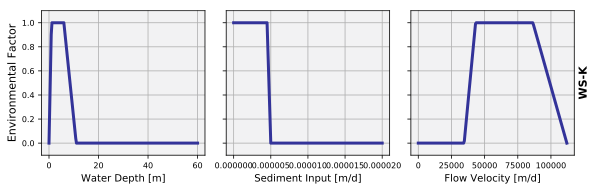

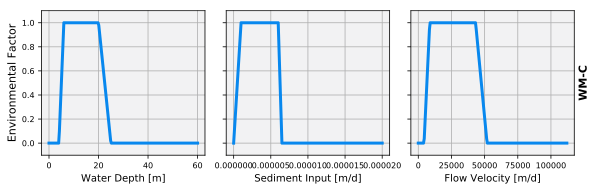

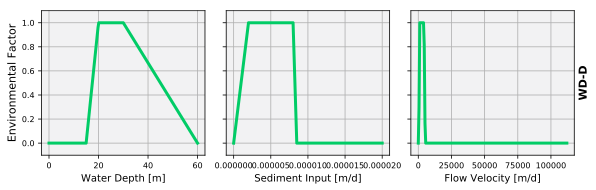

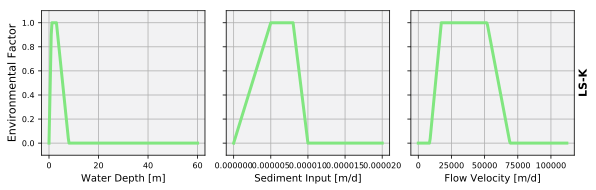

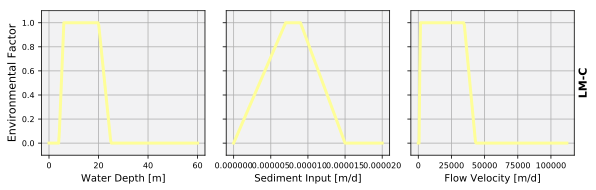

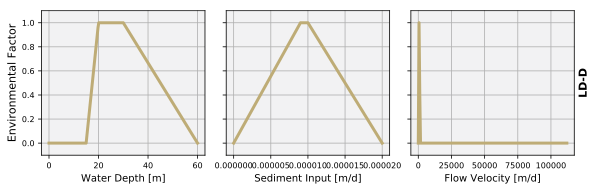


Environmental functions:


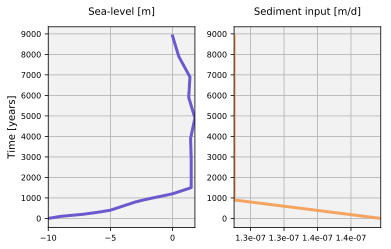

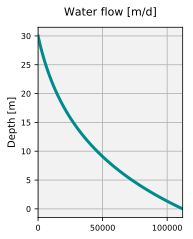

In [21]:
reef.core.initialSetting(size=(8,2.5), size2=(8,3.5))

# Model simulation

The core of the code consist in solving the system of ODEs from the **GLV** equations using the **RKF** method.

Once a species association population is resolved, carbonate production is calculated using a carbonate production factor. Production factors are specified for the maximum population, and linearly scaled to the actual population following the relation
$$ \frac{dP}{dt} = R_{max}\frac{x_i}{K_i}$$

where $P$ is the carbonate production, $t$ is time, $R_{max}$ is the carbonate production factor when population is at its maximum, and $K_i$ is the maximum population of species _i_, computed as

$$K_i=\frac{\epsilon_i}{\alpha_{ii}}$$

To run the model for a given time period [years], the following function needs to be called:

In [9]:
reef.run_to_time(8900,showtime=100.)

tNow = 0.0 [yr]
 Thick: 8.2e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.0
 Thick: 8.173e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.099918
 Thick: 8.146e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.19983627
 Thick: 8.119e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.29975481
 Thick: 8.092e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.39967362
 Thick: 8.065e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.4995927
 Thick: 8.038e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.59951205
 Thick: 8.011e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.69943167
 Thick: 7.984e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.79935156
 Thick: 7.957e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.89927172
tNow = 100.0 [yr]
 Thick: 7.93e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  2.99919215
 Thick: 7.903e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  3.17691285
 Thick: 7.876e-05 
 Prod: [ 0.  0.  0.  0.  0.  0.] 
 Accom:  3.35463382
 Thick: 7.849e-05 
 Prod: [ 0.

# Results

All the output from the model run can be plotted on the notebook using a series of internal functions presented below.

First one can specify a colormap to use for the plot using one of the matplotlib predefined colormap proposed here: 
- [colormaps_reference](http://matplotlib.org/examples/color/colormaps_reference.html)

In [10]:
from matplotlib.cm import terrain, plasma
nbcolors = len(reef.core.coralH)+10
colors = terrain(np.linspace(0, 1, nbcolors))

nbcolors = len(reef.core.layTime)+3
colors2 = plasma(np.linspace(0, 1, nbcolors))

## Species population evolution

- with time: `reef.plot.speciesTime`
- with depth: `reef.plot.speciesDepth`

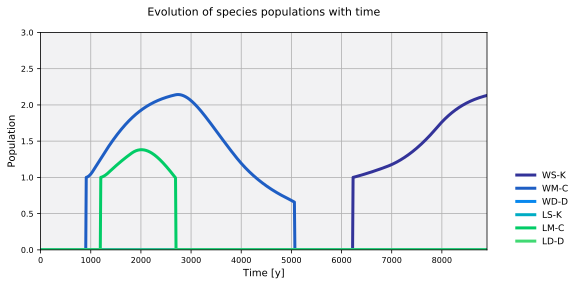

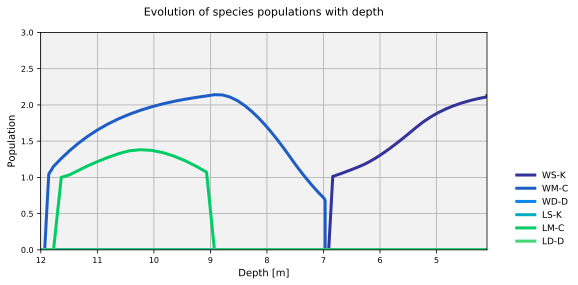

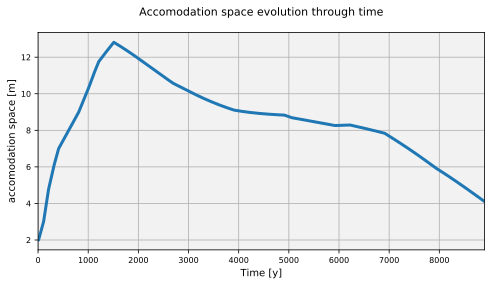

In [11]:
reef.plot.speciesTime(colors=colors, size=(8,4), font=8, dpi=100,fname=('apop_t-%s.pdf' % (run_nb)))
reef.plot.speciesDepth(colors=colors, size=(8,4), font=8, dpi=100, fname =('apop_d-%s.pdf' % (run_nb)))
reef.plot.accomodationTime(size=(8,4), font=8, dpi=100, fname =('acc_t-%s.pdf' % (run_nb)))

## Coral synthetic core

The main output of the model consists in the synthetic core which shows the evolution of the coral stratigraphic architecture obtained from the interactions among species and with their environment. The plot is obtained using the following function: 
- `reef.plot.drawCore`

The user has the option to save: 
- the figure using the `figname` parameter (`figname` could either have a _.png_ or _.pdf_ extension)
- the model output as a _CSV_ file using the `filename` parameter. This will dump all output dataset for further analysis if required.

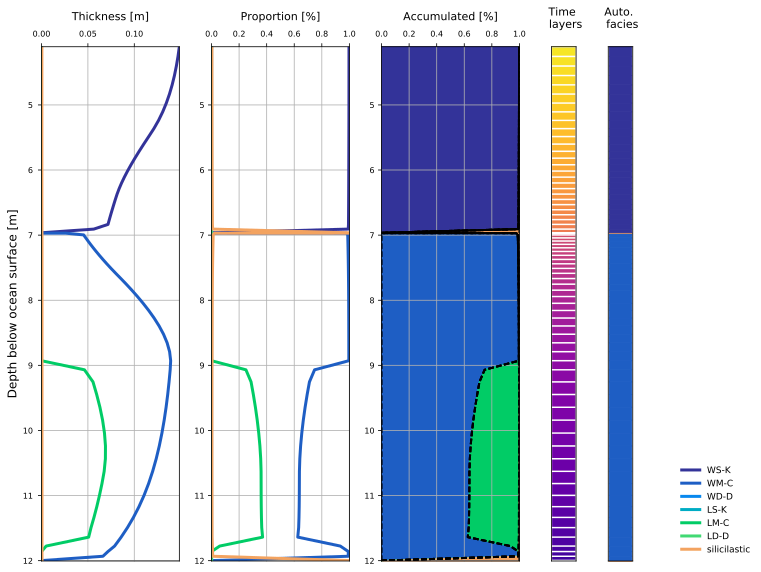

Figure has been saved in core-10.pdf


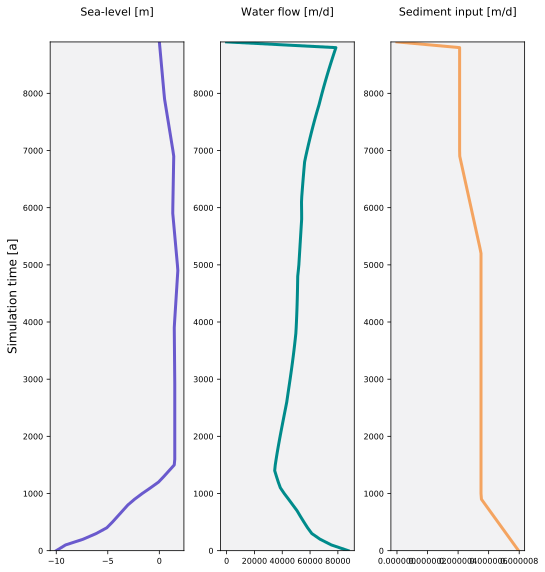

Figure has been saved in envicore-10.pdf

Model results have been saved in core-10.csv


In [12]:
reef.plot.drawCore(lwidth = 3, colsed=colors, coltime = colors2, size=(9,8), font=8, dpi=380, 
                   figname=('core-%s.pdf' % (run_nb)), filename=('core-%s.csv' % (run_nb)), sep='\t')

In [13]:
def gen_find(filepat,top):
    for path, dirlist, filelist in os.walk(top):
        for name in fnmatch.filter(filelist,filepat):
            yield os.path.join(path,name)
src = '/workspace/volume/pyReefCore/Tests'
dst = '/workspace/volume/pyReefCore/Tests/run-%s' % (run_nb)


pdflist = gen_find(('*-%s.pdf' % (run_nb)),src)
merger = PdfFileMerger()
for pdf in pdflist:
    merger.append(PdfFileReader(file(pdf, 'rb')))
merger.write("output-%s.pdf" % (run_nb))

shutil.copyfile(src+'/input_v3.xml', dst+'/input-%s.xml' %(run_nb))

filesToMove = gen_find(('*-%s.*' % (run_nb)),src)
for name in filesToMove:
    shutil.move(name, dst)

OSError: [Errno 26] Text file busy: '/workspace/volume/pyReefCore/Tests/envicore-10.pdf'